In [2]:
# Set seed for reproducing the result
from numpy.random import seed
from tensorflow.random import set_seed

seed(1)
set_seed(1)

# CNN 1

In [3]:
from matplotlib import pyplot
from keras.datasets import cifar10
import numpy as np
from tensorflow.keras.utils import to_categorical

In [4]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

170508288/170498071 [==============================] - 2s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


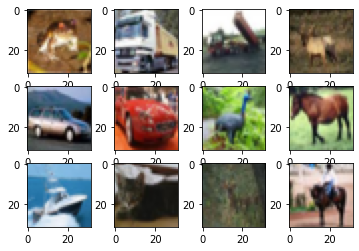

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


(32, 32, 3)

In [5]:
fig, axs = pyplot.subplots(3,4)
for i in range(3):
    for j in range(4):
        axs[i,j].imshow(trainX[4*i+j])
pyplot.show()
print(trainY)
trainX[0].shape

In [6]:
from sklearn.preprocessing import LabelBinarizer

In [7]:
lb = LabelBinarizer()
trainY = lb.fit_transform(y = trainY)
testY = lb.fit_transform(y = testY)
print(trainY)
print('X :',trainY.shape, testY.shape)
print(lb.inverse_transform(trainY))
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0
print('y :',trainX.shape, testX.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
X : (50000, 10) (10000, 10)
[6 9 9 ... 9 1 1]
y : (50000, 32, 32, 3) (10000, 32, 32, 3)


In [8]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import Sequential

In [9]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', strides= 1, padding='same', kernel_initializer='he_uniform' , input_shape=(32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [10]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

In [11]:
history = model.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY), verbose=1)

Epoch 1/30
782/782 [==============================] - 50s 8ms/step - loss: 1.9170 - accuracy: 0.3104 - val_loss: 1.4712 - val_accuracy: 0.4747
Epoch 2/30
782/782 [==============================] - 6s 7ms/step - loss: 1.4138 - accuracy: 0.4961 - val_loss: 1.2594 - val_accuracy: 0.5535
Epoch 3/30
782/782 [==============================] - 6s 7ms/step - loss: 1.2388 - accuracy: 0.5634 - val_loss: 1.1549 - val_accuracy: 0.5981
Epoch 4/30
782/782 [==============================] - 6s 7ms/step - loss: 1.0908 - accuracy: 0.6164 - val_loss: 1.1012 - val_accuracy: 0.6156
Epoch 5/30
782/782 [==============================] - 5s 7ms/step - loss: 1.0134 - accuracy: 0.6448 - val_loss: 1.0341 - val_accuracy: 0.6404
Epoch 6/30
782/782 [==============================] - 5s 7ms/step - loss: 0.9341 - accuracy: 0.6745 - val_loss: 0.9661 - val_accuracy: 0.6641
Epoch 7/30
782/782 [==============================] - 6s 7ms/step - loss: 0.8622 - accuracy: 0.6993 - val_loss: 0.9543 - val_accuracy: 0.6661
Epoch

In [12]:
from matplotlib import pyplot as plt

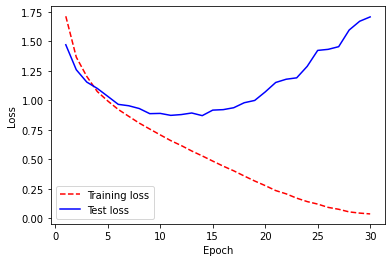

In [13]:
training_accuracy = history.history["loss"]
test_accuracy = history.history["val_loss"]

epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

In [14]:
loss , acc = model.evaluate(testX, testY, verbose=1)
print(loss, acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.7073 - accuracy: 0.7085
1.7072607278823853 0.7085000276565552


In [15]:
predict = model.predict(testX)
predict

array([[2.3864533e-07, 1.6071017e-08, 4.1403550e-10, ..., 4.7988875e-09,
        3.0735620e-05, 3.1782610e-12],
       [1.4072333e-07, 9.8420000e-01, 1.2820562e-18, ..., 1.4970618e-21,
        1.5799886e-02, 1.0235144e-13],
       [9.3049366e-06, 2.5695626e-05, 1.2699728e-08, ..., 1.8278377e-07,
        9.9994016e-01, 2.4569827e-05],
       ...,
       [5.4283782e-12, 8.1325641e-12, 7.0608199e-02, ..., 1.7074862e-01,
        6.6831674e-10, 2.0836435e-10],
       [1.1130771e-06, 9.9987745e-01, 6.4326981e-12, ..., 1.5560865e-12,
        1.2398305e-08, 2.1551618e-11],
       [9.5411919e-16, 1.5535307e-12, 6.7877093e-11, ..., 9.9990070e-01,
        6.2233064e-13, 2.0423885e-13]], dtype=float32)

In [16]:
roundPredict = np.zeros(predict.shape)
for i in range(len(predict)):
    index = np.argmax(predict[i])
    roundPredict[i, index] = 1
print(roundPredict)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(lb.inverse_transform(testY), 
                      lb.inverse_transform(roundPredict), 
                      normalize = 'true')
print(cm)

[[0.765 0.023 0.057 0.018 0.025 0.011 0.01  0.006 0.059 0.026]
 [0.028 0.837 0.006 0.011 0.005 0.006 0.009 0.004 0.021 0.073]
 [0.071 0.008 0.609 0.055 0.087 0.062 0.053 0.032 0.008 0.015]
 [0.026 0.012 0.072 0.506 0.069 0.171 0.065 0.037 0.023 0.019]
 [0.017 0.008 0.088 0.07  0.658 0.039 0.045 0.06  0.011 0.004]
 [0.015 0.004 0.052 0.178 0.045 0.606 0.026 0.056 0.01  0.008]
 [0.01  0.01  0.041 0.069 0.03  0.026 0.791 0.008 0.007 0.008]
 [0.017 0.01  0.036 0.041 0.064 0.065 0.009 0.739 0.006 0.013]
 [0.064 0.051 0.012 0.011 0.009 0.004 0.006 0.    0.822 0.021]
 [0.06  0.101 0.008 0.019 0.006 0.009 0.004 0.017 0.024 0.752]]


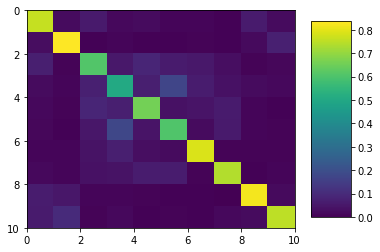

In [18]:
fig, ax = plt.subplots()
col = plt.pcolormesh(cm)
fig.colorbar(col, shrink=0.9, aspect=5)
ax.invert_yaxis()
plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(lb.inverse_transform(testY), 
                            lb.inverse_transform(roundPredict), 
                            target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                                            'dog', 'frog', 'horse', 'ship', 'truck']))

              precision    recall  f1-score   support

    airplane       0.71      0.77      0.74      1000
  automobile       0.79      0.84      0.81      1000
        bird       0.62      0.61      0.61      1000
         cat       0.52      0.51      0.51      1000
        deer       0.66      0.66      0.66      1000
         dog       0.61      0.61      0.61      1000
        frog       0.78      0.79      0.78      1000
       horse       0.77      0.74      0.75      1000
        ship       0.83      0.82      0.83      1000
       truck       0.80      0.75      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



# CNN 2

In [20]:
from matplotlib import pyplot
from keras.datasets import cifar10
import numpy as np
from tensorflow.keras.utils import to_categorical

In [21]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [22]:
from sklearn.preprocessing import LabelBinarizer

In [23]:
lb = LabelBinarizer()
trainY = lb.fit_transform(y = trainY)
testY = lb.fit_transform(y = testY)
print(trainY)
print('X :',trainY.shape, testY.shape)
print(lb.inverse_transform(trainY))
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0
print('y :',trainX.shape, testX.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
X : (50000, 10) (10000, 10)
[6 9 9 ... 9 1 1]
y : (50000, 32, 32, 3) (10000, 32, 32, 3)


In [24]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', strides= 1, padding='same', kernel_initializer='he_uniform' , input_shape=(32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)        

In [26]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

In [27]:
history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=1)

Epoch 1/50
782/782 [==============================] - 8s 9ms/step - loss: 1.9446 - accuracy: 0.2924 - val_loss: 1.4987 - val_accuracy: 0.4531
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 1.4241 - accuracy: 0.4886 - val_loss: 1.2686 - val_accuracy: 0.5433
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 1.2282 - accuracy: 0.5619 - val_loss: 1.1525 - val_accuracy: 0.5869
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 1.0836 - accuracy: 0.6178 - val_loss: 1.0768 - val_accuracy: 0.6217
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 0.9868 - accuracy: 0.6538 - val_loss: 0.9841 - val_accuracy: 0.6626
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 0.8942 - accuracy: 0.6870 - val_loss: 0.9160 - val_accuracy: 0.6791
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 0.8159 - accuracy: 0.7171 - val_loss: 0.9135 - val_accuracy: 0.6799
Epoch 

In [28]:
from matplotlib import pyplot as plt

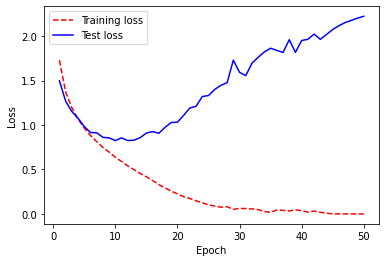

In [29]:
training_accuracy = history.history["loss"]
test_accuracy = history.history["val_loss"]

epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0.791 0.022 0.039 0.017 0.02  0.009 0.005 0.013 0.052 0.032]
 [0.018 0.852 0.003 0.01  0.003 0.008 0.005 0.003 0.029 0.069]
 [0.053 0.002 0.634 0.066 0.077 0.069 0.05  0.03  0.01  0.009]
 [0.026 0.01  0.066 0.554 0.067 0.163 0.055 0.036 0.008 0.015]
 [0.015 0.005 0.062 0.063 0.7   0.04  0.047 0.053 0.011 0.004]
 [0.008 0.003 0.047 0.166 0.048 0.641 0.023 0.046 0.01  0.008]
 [0.007 0.004 0.04  0.049 0.026 0.025 0.828 0.01  0.002 0.009]
 [0.02  0.005 0.032 0.038 0.046 0.054 0.008 0.783 0.005 0.009]
 [0.058 0.021 0.012 0.015 0.005 0.008 0.006 0.006 0.848 0.021]
 [0.031 0.069 0.005 0.015 0.002 0.008 0.007 0.015 0.023 0.825]]


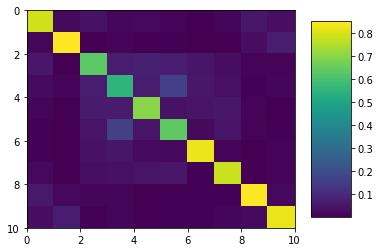

In [30]:
predict = model.predict(testX)
roundPredict = np.zeros(predict.shape)
for i in range(len(predict)):
    index = np.argmax(predict[i])
    roundPredict[i, index] = 1
print(roundPredict)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(lb.inverse_transform(testY), 
                      lb.inverse_transform(roundPredict), 
                      normalize = 'true')
print(cm)
fig, ax = plt.subplots()
col = plt.pcolormesh(cm)
fig.colorbar(col, shrink=0.9, aspect=5)
ax.invert_yaxis()
plt.show()

In [31]:
from sklearn.metrics import classification_report
print(classification_report(lb.inverse_transform(testY), 
                            lb.inverse_transform(roundPredict), 
                            target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                                            'dog', 'frog', 'horse', 'ship', 'truck']))

              precision    recall  f1-score   support

    airplane       0.77      0.79      0.78      1000
  automobile       0.86      0.85      0.85      1000
        bird       0.67      0.63      0.65      1000
         cat       0.56      0.55      0.56      1000
        deer       0.70      0.70      0.70      1000
         dog       0.63      0.64      0.63      1000
        frog       0.80      0.83      0.81      1000
       horse       0.79      0.78      0.78      1000
        ship       0.85      0.85      0.85      1000
       truck       0.82      0.82      0.82      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



# CNN 3

In [1]:
from matplotlib import pyplot as plt
from keras.datasets import cifar10
import numpy as np

In [2]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
print(f'trainX : {trainX.shape}, testX : {testX.shape}')
print(f'trainY : {trainY.shape}, testY : {testY.shape}')

170508288/170498071 [==============================] - 5s 0us/step
trainX : (50000, 32, 32, 3), testX : (10000, 32, 32, 3)
trainY : (50000, 1), testY : (10000, 1)


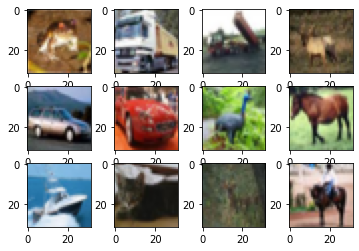

In [3]:
fig, axs = plt.subplots(3,4)
for i in range(3):
  for j in range(4):
    axs[i,j].imshow(trainX[4*i + j])
plt.show()

In [4]:
from sklearn.preprocessing import LabelBinarizer

In [5]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)
print(testY)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [6]:
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

In [7]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dropout

In [8]:
model = Sequential()
model.add(Conv2D(filters= 32, kernel_size= (3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_uniform', input_shape = (32,32,3)))
model.add(Conv2D(filters= 32, kernel_size= (3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides=1, padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(units = 128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(rate=0.2))
model.add(Dense(units = 10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [9]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss= "categorical_crossentropy", optimizer=opt, metrics = ["accuracy"])

In [10]:
history = model.fit(trainX, trainY, epochs=80, batch_size=64, validation_data=(testX, testY), verbose=1)

Epoch 1/80
782/782 [==============================] - 52s 9ms/step - loss: 2.2455 - accuracy: 0.1646 - val_loss: 1.7871 - val_accuracy: 0.3575
Epoch 2/80
782/782 [==============================] - 6s 8ms/step - loss: 1.7698 - accuracy: 0.3452 - val_loss: 1.5433 - val_accuracy: 0.4366
Epoch 3/80
782/782 [==============================] - 6s 8ms/step - loss: 1.5784 - accuracy: 0.4210 - val_loss: 1.4023 - val_accuracy: 0.4877
Epoch 4/80
782/782 [==============================] - 7s 8ms/step - loss: 1.4721 - accuracy: 0.4598 - val_loss: 1.3299 - val_accuracy: 0.5246
Epoch 5/80
782/782 [==============================] - 7s 8ms/step - loss: 1.3772 - accuracy: 0.4995 - val_loss: 1.2340 - val_accuracy: 0.5503
Epoch 6/80
782/782 [==============================] - 7s 8ms/step - loss: 1.3205 - accuracy: 0.5172 - val_loss: 1.2017 - val_accuracy: 0.5692
Epoch 7/80
782/782 [==============================] - 6s 8ms/step - loss: 1.2676 - accuracy: 0.5432 - val_loss: 1.1482 - val_accuracy: 0.5910
Epoch

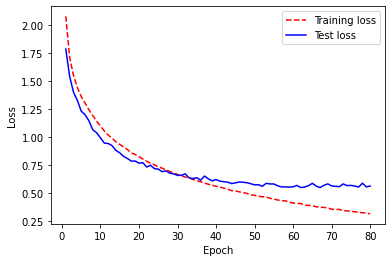

In [11]:
training_accuracy = history.history["loss"]
test_accuracy = history.history["val_loss"]

epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0.807 0.02  0.033 0.024 0.021 0.006 0.011 0.008 0.06  0.01 ]
 [0.004 0.933 0.005 0.006 0.003 0.002 0.009 0.001 0.014 0.023]
 [0.036 0.001 0.76  0.04  0.056 0.04  0.046 0.009 0.01  0.002]
 [0.012 0.007 0.053 0.66  0.05  0.13  0.058 0.017 0.009 0.004]
 [0.007 0.    0.046 0.036 0.81  0.031 0.039 0.026 0.004 0.001]
 [0.005 0.001 0.025 0.146 0.036 0.734 0.023 0.025 0.002 0.003]
 [0.003 0.001 0.022 0.043 0.018 0.017 0.889 0.002 0.005 0.   ]
 [0.002 0.001 0.02  0.037 0.051 0.045 0.006 0.834 0.    0.004]
 [0.027 0.018 0.01  0.013 0.004 0.002 0.004 0.003 0.913 0.006]
 [0.022 0.084 0.003 0.012 0.002 0.002 0.006 0.005 0.022 0.842]]


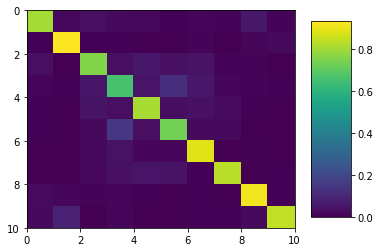

In [12]:
predict = model.predict(testX)

# round Prediction to one hot vector
roundPredict = np.zeros(predict.shape)
for i in range(len(predict)):
    index = np.argmax(predict[i])
    roundPredict[i, index] = 1
print(roundPredict)

# create confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(lb.inverse_transform(testY), 
                      lb.inverse_transform(roundPredict), 
                      normalize = 'true')
print(cm)

#plot confusion_matrix
fig, ax = plt.subplots()
col = plt.pcolormesh(cm)
fig.colorbar(col, shrink=0.9, aspect=5)
ax.invert_yaxis()
plt.show()

In [13]:
# report classification
from sklearn.metrics import classification_report
print(classification_report(lb.inverse_transform(testY), 
                            lb.inverse_transform(roundPredict), 
                            target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                                            'dog', 'frog', 'horse', 'ship', 'truck']))

              precision    recall  f1-score   support

    airplane       0.87      0.81      0.84      1000
  automobile       0.88      0.93      0.90      1000
        bird       0.78      0.76      0.77      1000
         cat       0.65      0.66      0.65      1000
        deer       0.77      0.81      0.79      1000
         dog       0.73      0.73      0.73      1000
        frog       0.81      0.89      0.85      1000
       horse       0.90      0.83      0.86      1000
        ship       0.88      0.91      0.90      1000
       truck       0.94      0.84      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



# CNN 4